In [13]:
import numpy as np
import pandas as pd
import random
!ls

Activity 2                              Lecture 10.2 Pt.2.ipynb
Activity 4                              Lecture 10.2 Pt.3.ipynb
AirPassengers.csv                       Lecture 10.2 Pt.4.ipynb
GSPC.csv                                osptx.csv
Lecture 10.2 - Time Series Models.ipynb


In [14]:
df = pd.read_csv('GSPC.csv', index_col='Date', infer_datetime_format=True)
df.index = pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-01-02,740.739990,742.809998,729.549988,737.010010,737.010010,463230000
1997-01-03,737.010010,748.239990,737.010010,748.030029,748.030029,452970000
1997-01-06,748.030029,753.309998,743.820007,747.650024,747.650024,531350000
1997-01-07,747.650024,753.260010,742.179993,753.229980,753.229980,538220000
1997-01-08,753.229980,755.719971,747.710022,748.409973,748.409973,557510000


<AxesSubplot:xlabel='Date'>

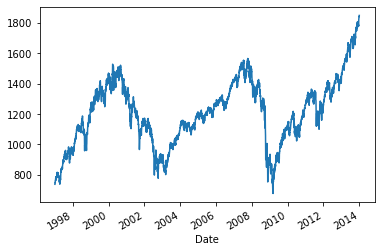

In [15]:
df.Close.plot()

<AxesSubplot:xlabel='Date'>

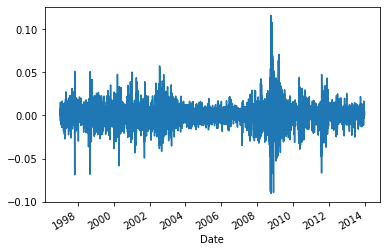

In [23]:
df['pct_change'] = df['Close'].pct_change()
df.dropna(inplace=True)
df['pct_change'].plot()

In [24]:
! pip install arch

In [25]:
from arch import arch_model
model = arch_model(df['pct_change'], mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

/opt/anaconda3/envs/masterenv/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001671. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:             pct_change   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                13351.0
Distribution:                  Normal   AIC:                          -26695.9
Method:            Maximum Likelihood   BIC:                          -26676.8
                                        No. Observations:                 4277
Date:                Tue, Apr 26 2022   Df Residuals:                     4277
Time:                        18:10:01   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.2924e-06  1.513e-10  2.176e+04      0.000 [3.292e-06,3.293e-06]
alpha[1]       0.1100  5.777e-04    190.324      0.000     [  0.109,  0.111]
beta[1]        0.8703  3.409e-03    255.293      0.000     [  0.864,  0.877]
============================================================================

Covariance estimator: robust
"""

/opt/anaconda3/envs/masterenv/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


<AxesSubplot:>

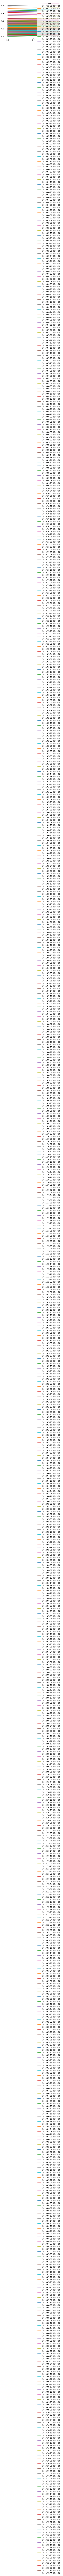

In [26]:
forecast_horizon = 3
forecasts = res.forecast(start='2009-12-31', horizon=forecast_horizon)

intermediate = np.sqrt(forecasts.variance.dropna()*252)
final = intermediate.dropna().T
final.plot()